# Homework3
### Problem 1.1

You should simulate an epidemic on a symmetric k-regular graph \( G = (\mathcal{V}, \mathcal{E}) \) with \( |\mathcal{V}| = 500 \) nodes and \( k = 6 \). See Figure 1 for an example with \( n = 8 \) nodes and \( k = 6 \). Let \( \beta = 0.25 \) and \( \rho = 0.6 \). With one week being one unit of time, simulate the epidemic for 15 weeks. You can choose an initial configuration with 10 infected nodes selected at random from the node set \( \mathcal{V} \), or make a different choice of initial configuration (in the latter case, please briefly discuss your motivation).

Do this \( N = 100 \) times and plot the following:

- The average number of newly infected individuals each week. In other words, you should plot how many people **become infected** each week (on the average).

- The average total number of susceptible, infected, and recovered individuals at each week. In other words, you should plot how many individuals **in total** are susceptible/infected/recovered at each week (on the average).


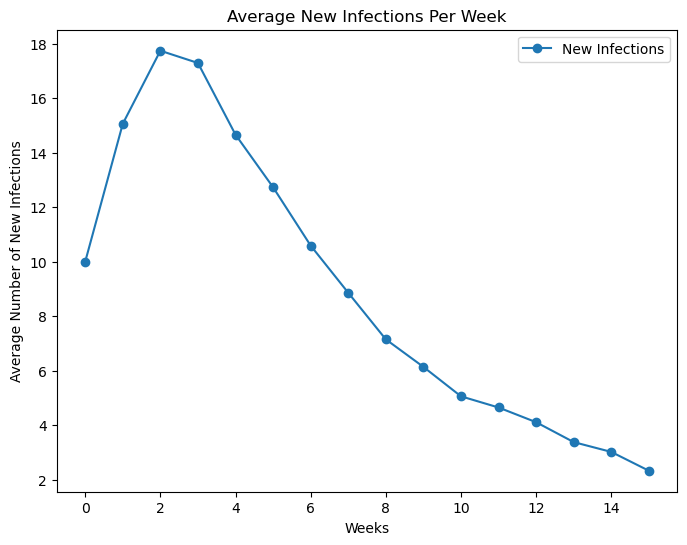

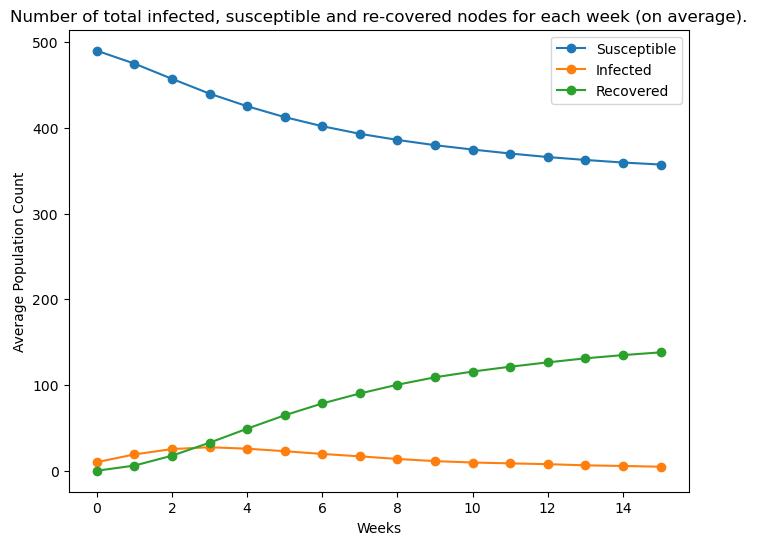

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import scipy.sparse as sp

total_nodes = 500  
k = 6  # Average degree
beta = 0.25  # Infection probability
rho = 0.6  # Recovery probability
weeks = 15  
N = 100  

def generate_k_regular_graph(n, k):
    adjacency = sp.lil_matrix((n, n))  # Sparse matrix for efficiency
    for i in range(n):
        for j in range(1, k // 2 + 1):
            adjacency[i, (i + j) % n] = 1
            adjacency[i, (i - j) % n] = 1
    return adjacency.tocsr()

sparse_graph = generate_k_regular_graph(total_nodes, k)
graph = nx.from_scipy_sparse_array(sparse_graph)  # Convert to NetworkX graph

def simulate_epidemic(graph):
    S = np.zeros((weeks+1, N))
    I = np.zeros((weeks+1, N))
    R = np.zeros((weeks+1, N))
    new_infections = np.zeros((weeks+1, N))

    for sim in range(N):
        states = np.zeros(total_nodes)
        initial_infected = np.random.choice(total_nodes, 10, replace=False)
        states[initial_infected] = 1

        # Track counts
        S[0, sim] = total_nodes - 10
        I[0, sim] = 10
        new_infections[0, sim] = 10  # let's ensure that t=0 is 10.
        R[0, sim] = 0
        
        for t in range(1,weeks+1):
            new_states = states.copy()
            for node in range(total_nodes):
                # 0: susceptible, 1: infected, 2: recovered
                if states[node] == 0:  # susceptible
                    infected_neighbors = sum([states[neighbor] == 1 for neighbor in graph.neighbors(node)])
                    p_infection = 1 - (1 - beta) ** infected_neighbors
                    if np.random.rand() < p_infection:
                        new_states[node] = 1
                elif states[node] == 1:  # infected
                    if np.random.rand() < rho:
                        new_states[node] = 2 # recovered

            # Update states
            new_infected = np.sum((states == 0) & (new_states == 1))
            new_infections[t, sim] = new_infected
            states = new_states

            # Track counts
            S[t, sim] = np.sum(states == 0)
            I[t, sim] = np.sum(states == 1)
            R[t, sim] = np.sum(states == 2)

    return S, I, R, new_infections

S, I, R, new_infections = simulate_epidemic(graph)

avg_S = np.mean(S, axis=1)
avg_I = np.mean(I, axis=1)
avg_R = np.mean(R, axis=1)
avg_new_infections = np.mean(new_infections, axis=1)


plt.figure(figsize=(8, 6))
plt.plot(range(weeks + 1), avg_new_infections, marker='o', label='New Infections')
plt.xlabel('Weeks')
plt.ylabel('Average Number of New Infections')
plt.title('Average New Infections Per Week')
plt.legend()
plt.show()

# Plot SIR curves
plt.figure(figsize=(8, 6))
plt.plot(range(weeks + 1), avg_S, marker='o', label='Susceptible')
plt.plot(range(weeks + 1), avg_I, marker='o', label='Infected')
plt.plot(range(weeks + 1), avg_R, marker='o', label='Recovered')
plt.xlabel('Weeks')
plt.ylabel('Average Population Count')
plt.title('Number of total infected, susceptible and re-covered nodes for each week (on average).')
plt.legend()
plt.show()


### Problem 1.2

Your goal is to, by using preferential attachment, generate a random graph of a large size (at least 900 nodes) with average degree \( k \in \mathbb{Z}^+ \). Let the initial graph \( G_1 = (\mathcal{V}_1, \mathcal{E}_1) \) be a complete graph with \( |\mathcal{V}_1| = k_0 = k + 1 \) nodes.

Note that the goal here is to implement a fairly general algorithm where it is very easy to change the average degree. It should be possible to change the average degree by only changing the value of \( k \) in your algorithm. This algorithm will then be used in Section 1.4.


In [24]:
import math

def generate_preferential_attachment_graph(number_nodes, k):
    #function to get a random complete graph with average degree=k
    graph = nx.complete_graph(k + 1)

    for i in range(k + 1, number_nodes):
        # Get degrees of all existing nodes
        degrees = np.array([degree for _, degree in graph.degree()])
        total_degree = np.sum(degrees)

        # Compute connection probabilities proportional to node degrees
        connection_probs = degrees / total_degree

        # Determine the number of edges to add (alternate between floor and ceil for odd k)
        c = math.floor(k / 2) if i % 2 == 0 else math.ceil(k / 2)

        # Select neighbors for the new node based on probabilities
        neighbors = np.random.choice(
            np.arange(graph.number_of_nodes()), size=c, replace=False, p=connection_probs
        )

        # Add edges between the new node and its neighbors
        for neighbor in neighbors:
            graph.add_edge(i, neighbor)

    return graph

total_nodes = 900
k = 6  

random_graph = generate_preferential_attachment_graph(total_nodes, k)

average_degree = np.mean([degree for _, degree in random_graph.degree()])
print(f"Generated graph with {random_graph.number_of_nodes()} nodes and average degree {average_degree:.2f}")


Generated graph with 900 nodes and average degree 6.00


### Problem 2

Using the methods developed in Section 1.1, generate a preferential attachment random graph \( G = (\mathcal{V}, \mathcal{E}) \), with \( |\mathcal{V}| = 500 \) nodes. The average degree should be \( k = 6 \). Let \( \beta = 0.25 \) and \( \rho = 0.6 \). With one week being one unit of time, simulate the epidemic for 15 weeks. You can choose an initial configuration with 10 infected nodes selected at random from the node set \( \mathcal{V} \), or make a different choice of initial configuration (in the latter case, please briefly discuss your motivation).

Do this \( N = 100 \) times and plot the following:

- The average number of newly infected individuals each week. In other words, you should plot how many individuals **become infected** each week.

- The average total number of susceptible, infected, and recovered individuals at each week. In other words, you should plot how many individuals **in total** that are susceptible/infected/recovered at each week.


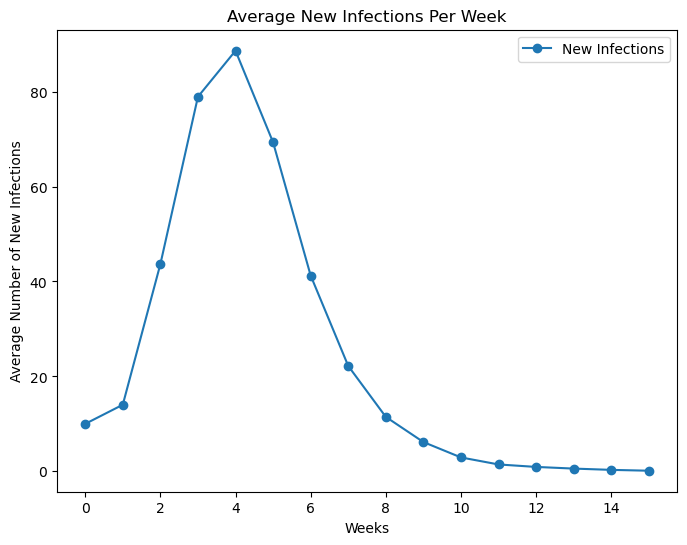

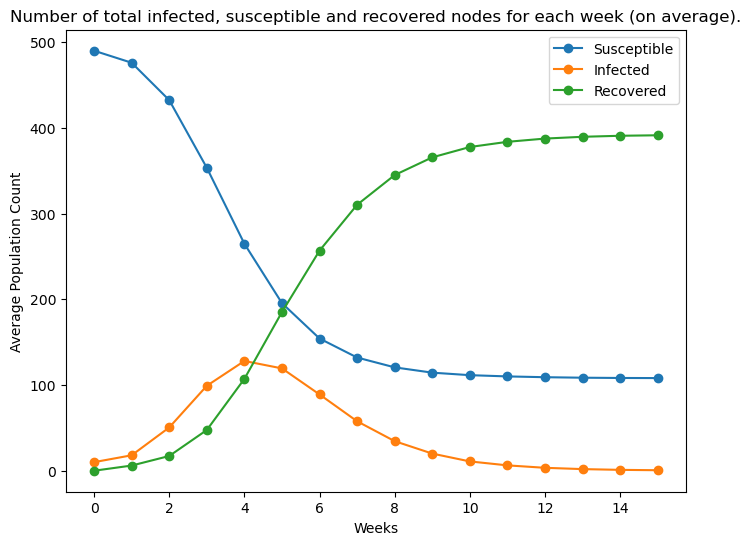

In [27]:
# Parameters
total_nodes = 500  # Number of nodes
k = 6  # Average degree
beta = 0.25  # Infection probability
rho = 0.6  # Recovery probability
weeks = 15  # Number of weeks to simulate
N = 100  # Number of simulations

# Load the graph from Problem 1.2
graph = generate_preferential_attachment_graph(total_nodes, k)

S, I, R, new_infections = simulate_epidemic(graph)

avg_S = np.mean(S, axis=1)
avg_I = np.mean(I, axis=1)
avg_R = np.mean(R, axis=1)
avg_new_infections = np.mean(new_infections, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(avg_new_infections, marker='o', label='New Infections')  
plt.xlabel('Weeks')
plt.ylabel('Average Number of New Infections')
plt.title('Average New Infections Per Week')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(avg_S, marker='o', label='Susceptible')  
plt.plot(avg_I, marker='o', label='Infected')    
plt.plot(avg_R, marker='o', label='Recovered')  
plt.xlabel('Weeks')
plt.ylabel('Average Population Count')
plt.title('Number of total infected, susceptible and recovered nodes for each week (on average).')
plt.legend()
plt.show()


### Problem 3

Using the method developed in the previous section, generate a random graph \( G = (\mathcal{V}, \mathcal{E}) \), with \( |\mathcal{V}| = 500 \) nodes. The average degree should be \( k = 6 \). Let \( \beta = 0.25 \) and \( \rho = 0.6 \). With one week being one unit of time, simulate the epidemic **with vaccination** for 15 weeks, using the vaccination scheme \( \text{Vacc}(t) \) above. You can choose an initial configuration with 10 infected nodes selected at random from the node set \( \mathcal{V} \), or make a different choice of initial configuration (in the latter case, please briefly discuss your motivation).

Do this \( N = 100 \) times and plot the following:

- The average number of **newly infected** and **newly vaccinated** individuals each week.

- The average total number of susceptible, infected, recovered, and vaccinated individuals at each week.


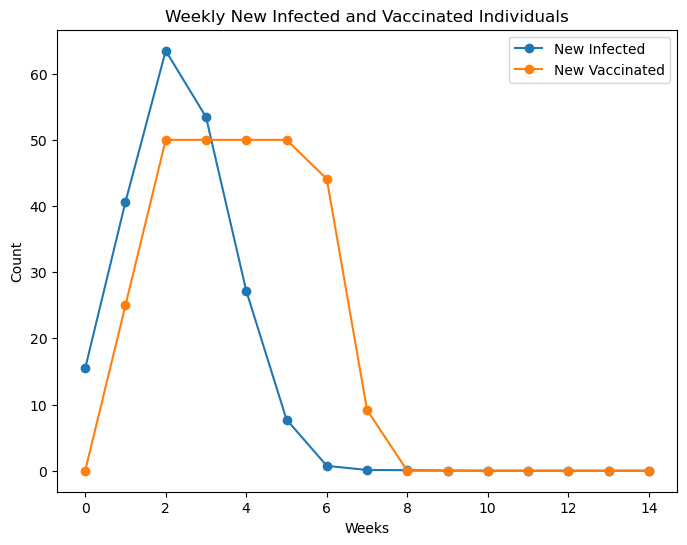

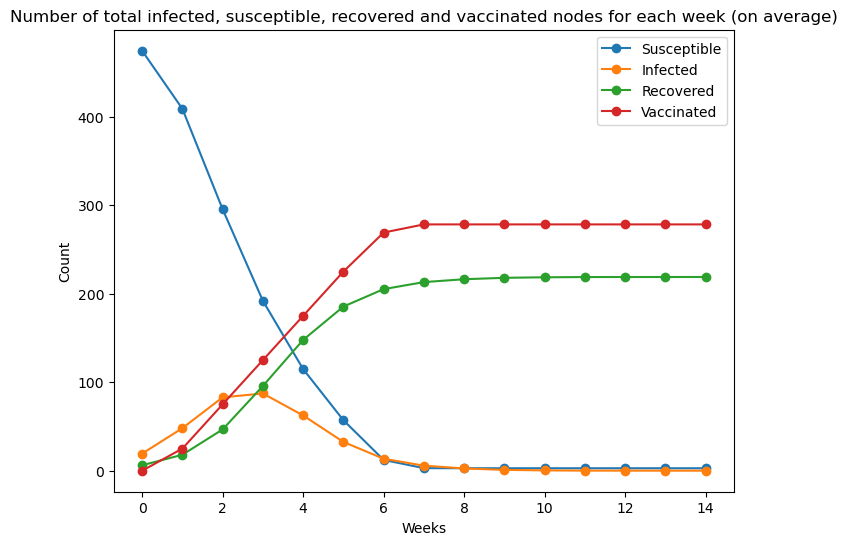

In [31]:
N = 500  
k = 6  
beta = 0.25 
rho = 0.6  
weeks = 15  
initial_infected = 10  
vacc_schedule = [0, 5, 15, 25, 35, 45, 55, 60, 60, 60, 60, 60, 60, 60, 60]  # Vaccination percentages
simulations = 100

G = generate_preferential_attachment_graph(total_nodes, k)

# SIR Simulation with Vaccination
def simulate_epidemic_with_vaccination(G):
    results = {
        'new_infected': np.zeros(weeks),
        'new_vaccinated': np.zeros(weeks),
        'susceptible': np.zeros(weeks),
        'infected': np.zeros(weeks),
        'recovered': np.zeros(weeks),
        'vaccinated': np.zeros(weeks)
    }

    for _ in range(simulations):
        # Initialize states
        states = {node: 'S' for node in G.nodes}
        infected_nodes = np.random.choice(G.nodes, initial_infected, replace=False)
        for node in infected_nodes:
            states[node] = 'I'

        vaccinated = set()
        recovered = set()

        for t in range(weeks):
            # Vaccinate individuals
            num_to_vaccinate = int((vacc_schedule[t] / 100) * N) - len(vaccinated)
            susceptible_nodes = [node for node in G.nodes if states[node] == 'S']
            vaccinate_nodes = np.random.choice(susceptible_nodes, min(num_to_vaccinate, len(susceptible_nodes)), replace=False)
            vaccinated.update(vaccinate_nodes)
            for node in vaccinate_nodes:
                states[node] = 'V'

            # Update state counts
            results['new_vaccinated'][t] += len(vaccinate_nodes)

            new_infected = []
            new_recovered = []
            
            # Spread infection
            for node in G.nodes:
                if states[node] == 'S':
                    infected_neighbors = sum(1 for neighbor in G.neighbors(node) if states[neighbor] == 'I')
                    if np.random.rand() < 1 - (1 - beta) ** infected_neighbors:
                        new_infected.append(node)
                elif states[node] == 'I':
                    if np.random.rand() < rho:
                        new_recovered.append(node)

            # Update states
            for node in new_infected:
                states[node] = 'I'
            for node in new_recovered:
                states[node] = 'R'

            # Record results
            results['new_infected'][t] += len(new_infected)
            results['susceptible'][t] += sum(1 for s in states.values() if s == 'S')
            results['infected'][t] += sum(1 for s in states.values() if s == 'I')
            results['recovered'][t] += sum(1 for s in states.values() if s == 'R')
            results['vaccinated'][t] += len(vaccinated)

    # Average results over simulations
    for key in results:
        results[key] /= simulations

    return results

G = generate_preferential_attachment_graph(total_nodes, k)
results = simulate_epidemic_with_vaccination(G)

plt.figure(figsize=(8, 6))
plt.plot(results['new_infected'], marker='o', label='New Infected')  
plt.plot(results['new_vaccinated'], marker='o', label='New Vaccinated') 
plt.title('Weekly New Infected and Vaccinated Individuals')
plt.xlabel('Weeks')
plt.ylabel('Count')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(results['susceptible'], marker='o', label='Susceptible') 
plt.plot(results['infected'], marker='o', label='Infected')        
plt.plot(results['recovered'], marker='o', label='Recovered')     
plt.plot(results['vaccinated'], marker='o', label='Vaccinated')   
plt.title('Number of total infected, susceptible, recovered and vaccinated nodes for each week (on average)')
plt.xlabel('Weeks')
plt.ylabel('Count')
plt.legend()
plt.show()


### Algorithm

Start with an initial guess of the parameters, \( k_0 \), \( \beta_0 \), and \( \rho_0 \) (here one could use \( k_0 = 10 \), \( \beta_0 = 0.3 \), \( \rho_0 = 0.6 \) as an initial guess) along with some \( \Delta k \), \( \Delta \beta \), and \( \Delta \rho \) (here one might use \( \Delta k = 1 \), \( \Delta \beta = 0.1 \), and \( \Delta \rho = 0.1 \)).

1. For each set of parameters (\( k \), \( \beta \), \( \rho \)) in the parameter-space:

    - \( k \in \{ k_0 - \Delta k, k_0, k_0 + \Delta k \} \)
    - \( \beta \in \{ \beta_0 - \Delta \beta, \beta_0, \beta_0 + \Delta \beta \} \)
    - \( \rho \in \{ \rho_0 - \Delta \rho, \rho_0, \rho_0 + \Delta \rho \} \)

    a) Generate a random graph \( G = (\mathcal{V}, \mathcal{E}) \) using the preferential attachment model developed in Section 1.1.2. The average degree should be \( k \), and there should be \( |\mathcal{V}| = 934 \) nodes in the graph.

    b) Starting from week 42, simulate the pandemic for 15 weeks on \( G \). You should use the method developed in Section 1.3 with the vaccination scheme described above. Do this \( N = 10 \) times, and compute the **average number of newly infected individuals** each week, \( I(t) \).

    c) Compute the **root-mean-square error (RMSE)** between the simulation and the real pandemic:

    $$
    \text{RMSE} = \sqrt{\frac{1}{15} \sum_{t=1}^{15} \left( I(t) - I_0(t) \right)^2 }
    $$

    where \( I(t) \) is the average number of newly infected individuals each week in the simulation and \( I_0(t) \) is the true value of newly infected individuals each week.

2. Update \( k_0 \), \( \beta_0 \), and \( \rho_0 \) to the set of parameters yielding the lowest RMSE. If the result was the same set of parameters, the algorithm should stop.

---

### Problem 4

Using the algorithm above, estimate the average degree \( k \) and the disease-spread parameters \( \beta \) and \( \rho \) for the pandemic.

Once you have found the best estimate, report what parameters you got. You should also show the following plots:

- The average number of **newly infected** individuals each week according to the model (with your best parameters) compared to the true value of newly infected individuals each week.
- The total number of susceptible, infected, recovered, and vaccinated individuals at each week according to the model.

**Hint:** The algorithm will be somewhat slow to execute as it needs to run the method developed in Section 1.3 multiple times before updating \( k_0 \), \( \beta_0 \), \( \rho_0 \).

It might be a good idea to play around with the values of \( \Delta k \), \( \Delta \beta \), and \( \Delta \rho \). For instance, you can start with large values and then decrease them when you cannot find a better set of parameters (for example, you can reduce them by half).


k=8, beta=0.09999999999999998, rho=0.39999999999999997, RMSE=7.895568377260754
k=8, beta=0.09999999999999998, rho=0.6, RMSE=10.13242320474229
k=8, beta=0.09999999999999998, rho=0.8, RMSE=11.742657280190032
k=8, beta=0.3, rho=0.39999999999999997, RMSE=74.91919647193235
k=8, beta=0.3, rho=0.6, RMSE=69.6927495033259
k=8, beta=0.3, rho=0.8, RMSE=64.98509059776711
k=8, beta=0.5, rho=0.39999999999999997, RMSE=110.7472527875974
k=8, beta=0.5, rho=0.6, RMSE=110.3394368905938
k=8, beta=0.5, rho=0.8, RMSE=103.59019902159342
k=10, beta=0.09999999999999998, rho=0.39999999999999997, RMSE=18.623980956462198
k=10, beta=0.09999999999999998, rho=0.6, RMSE=12.114784356314397
k=10, beta=0.09999999999999998, rho=0.8, RMSE=12.24788417101773
k=10, beta=0.3, rho=0.39999999999999997, RMSE=89.33218531600653
k=10, beta=0.3, rho=0.6, RMSE=85.49546966555206
k=10, beta=0.3, rho=0.8, RMSE=83.12391553177301
k=10, beta=0.5, rho=0.39999999999999997, RMSE=123.0182344207557
k=10, beta=0.5, rho=0.6, RMSE=119.861219750176

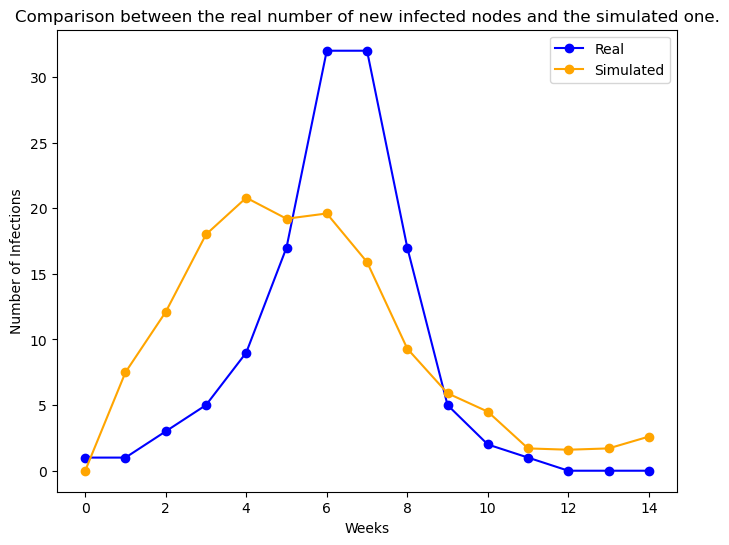

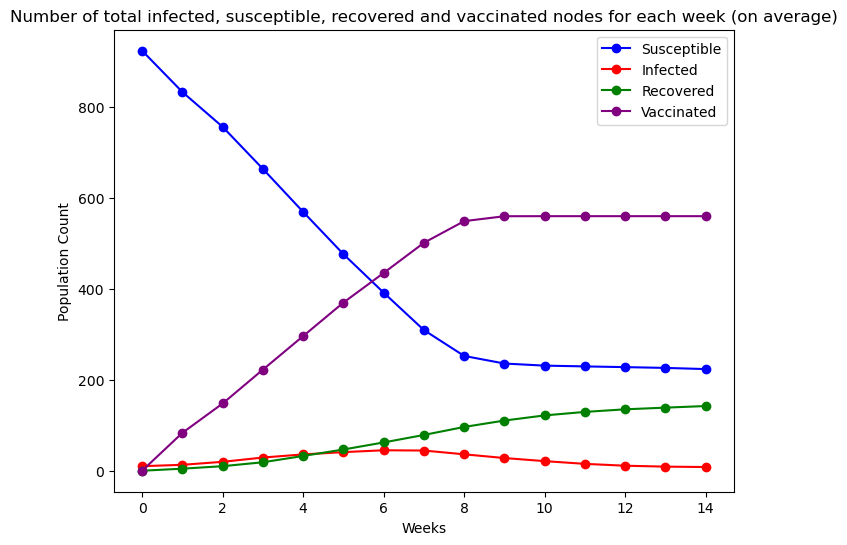

In [37]:
total_nodes = 934  # Scaled population size
k0 = 10  # Initial average degree
beta0 = 0.3  
rho0 = 0.6  
weeks = 15  
N = 10  

# Vaccination schedule
vaccination_schedule = [5, 9, 16, 24, 32, 40, 47, 54, 59, 60, 60, 60, 60, 60, 60]

# Observed infections (scaled)
observed_infections = [1, 1, 3, 5, 9, 17, 32, 32, 17, 5, 2, 1, 0, 0, 0]

# Generate preferential attachment graph
def generate_preferential_attachment_graph(n, k):
    G = nx.barabasi_albert_graph(n, k // 2)
    return G


def simulate_epidemic(graph, beta, rho):
    S = np.zeros((weeks, N))
    I = np.zeros((weeks, N))
    R = np.zeros((weeks, N))
    V = np.zeros((weeks, N))
    new_infections = np.zeros((weeks, N))

    for sim in range(N):
        states = np.zeros(total_nodes)
        initial_infected = np.random.choice(total_nodes, 10, replace=False)
        states[initial_infected] = 1

        S[0, sim] = total_nodes - 10
        I[0, sim] = 10
        R[0, sim] = 0
        V[0, sim] = 0

        for t in range(1, weeks):
            new_states = states.copy()

            # Vaccination process
            num_vaccinated = int(total_nodes * vaccination_schedule[t] / 100) - np.sum(states == 3)
            if num_vaccinated > 0:
                susceptibles = np.where(states == 0)[0]
                if len(susceptibles) > 0:
                    to_vaccinate = np.random.choice(susceptibles, min(num_vaccinated, len(susceptibles)), replace=False)
                    new_states[to_vaccinate] = 3

            # Disease spread and recovery
            for node in range(total_nodes):
                if states[node] == 0:  # Susceptible
                    infected_neighbors = sum([states[neighbor] == 1 for neighbor in graph.neighbors(node)])
                    p_infection = 1 - (1 - beta) ** infected_neighbors
                    if np.random.rand() < p_infection:
                        new_states[node] = 1
                elif states[node] == 1:  # Infected
                    if np.random.rand() < rho:
                        new_states[node] = 2

            new_infections[t, sim] = np.sum((states == 0) & (new_states == 1))
            states = new_states

            S[t, sim] = np.sum(states == 0)
            I[t, sim] = np.sum(states == 1)
            R[t, sim] = np.sum(states == 2)
            V[t, sim] = np.sum(states == 3)

    return np.mean(S, axis=1), np.mean(I, axis=1), np.mean(R, axis=1), np.mean(V, axis=1), np.mean(new_infections, axis=1)

# RMSE calculation
def calculate_rmse(simulated, observed):
    return np.sqrt(np.mean((np.array(simulated) - np.array(observed)) ** 2))

# Parameter optimization
best_rmse = float('inf')
best_params = (k0, beta0, rho0)

# Initial step sizes
delta_k, delta_beta, delta_rho = 2, 0.2, 0.2

while delta_k > 0.1 or delta_beta > 0.01 or delta_rho > 0.01:
    improved = False
    for dk in [-delta_k, 0, delta_k]:
        for db in [-delta_beta, 0, delta_beta]:
            for dr in [-delta_rho, 0, delta_rho]:
                k = k0 + dk
                beta = beta0 + db
                rho = rho0 + dr

                # Generate graph and simulate
                graph = generate_preferential_attachment_graph(total_nodes, int(k))
                S, I, R, V, new_infections = simulate_epidemic(graph, beta, rho)

                # Compute RMSE
                rmse = calculate_rmse(new_infections, observed_infections)

                # Print intermediate parameters and RMSE
                print(f'k={k}, beta={beta}, rho={rho}, RMSE={rmse}')

                # Update best parameters
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_params = (k, beta, rho)
                    improved = True

    # Reduce step sizes if no improvement
    if not improved:
        delta_k /= 2
        delta_beta /= 2
        delta_rho /= 2


print("Best Parameters: k =", best_params[0], ", beta =", best_params[1], ", rho =", best_params[2])
print("Best RMSE:", best_rmse)


graph = generate_preferential_attachment_graph(total_nodes, best_params[0])
S, I, R, V, new_infections = simulate_epidemic(graph, best_params[1], best_params[2])

plt.figure(figsize=(8, 6))
plt.plot(observed_infections, label='Real', marker='o', color='blue')  
plt.plot(new_infections, label='Simulated', marker='o', color='orange')
plt.xlabel('Weeks')
plt.ylabel('Number of Infections')
plt.title('Comparison between the real number of new infected nodes and the simulated one.')
plt.legend()
plt.show()

# S, I, R, V 
plt.figure(figsize=(8, 6))
plt.plot(S, label='Susceptible', marker='o',color='blue') 
plt.plot(I, label='Infected', marker='o', color='red')    
plt.plot(R, label='Recovered', marker='o', color='green') 
plt.plot(V, label='Vaccinated', marker='o', color='purple')
plt.xlabel('Weeks')
plt.ylabel('Population Count')
plt.title('Number of total infected, susceptible, recovered and vaccinated nodes for each week (on average)')
plt.legend()
plt.show()
